



<img src="https://i.pinimg.com/736x/12/f1/da/12f1da9ea6bb1f16f86258b4a95ae7a7.jpg" width ="250">


# **Assignment: Quiz 2 - Data Preparation & Feature Engineering**
##  UCI Automobile and Data Processing Project
## Author: Ahmed Ali
## Date: June 11, 2025
---

## **Part 1: Data Loading**
In this section, we load the UCI Automobile dataset from our GitHub repository and assign the correct column names based on the UCI documentation. We also preview the first few rows to confirm successful loading.


SETUP AND IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/AhmedKamal-41/automobile-eda-feature-engineering/refs/heads/main/imports-85.data"

columns = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
    "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height",
    "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "price"
]

# Load data with pandas
df = pd.read_csv(url, names=columns)

# Show the first 5 rows
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The dataset was successfully loaded into a DataFrame. Below is a preview of the first few rows to verify correctness.

---

## **Part2: Exploratory Data Analysis (EDA)**

This section presents exploratory data analysis (EDA) to help understand the structure and contents of the dataset. It includes descriptive statistics, missing value checks, variable type identification, and visualizations. All analysis is performed using Python. Conclusions are provided at the end of the section.



### **1. Check Dataset Structure**

In [3]:
# Dataset structure and column types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

All columns have 205 non-null values

But many columns like normalized-losses, horsepower, bore, etc., are marked as object dtype

Why?

Because they contain non-numeric placeholders like '?', which causes Pandas to treat the entire column as object (string), not as int or float.

So, Pandas doesn’t recognize '?' as missing, which is why info() says 205 non-null.

### **2. Replace Missing Values ('?') with NaN**

In [4]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

We still have an issue — some attributes, such as prices, are incorrectly stored as object data types

### **3. Convert Numeric Columns from Object to Float**

In [7]:
# List of numeric columns that need conversion
numeric_columns = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]

# Convert to float, using errors='coerce' to handle NaNs
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### **4. Check missing data after Data correction**


In [9]:
# Count missing values per column
print(df.isna().sum())


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


### **5. Summary Statistics for Numeric Columns**

In [10]:
df.describe()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### **6. Visualizations**

**Histograms for Numeric Features**

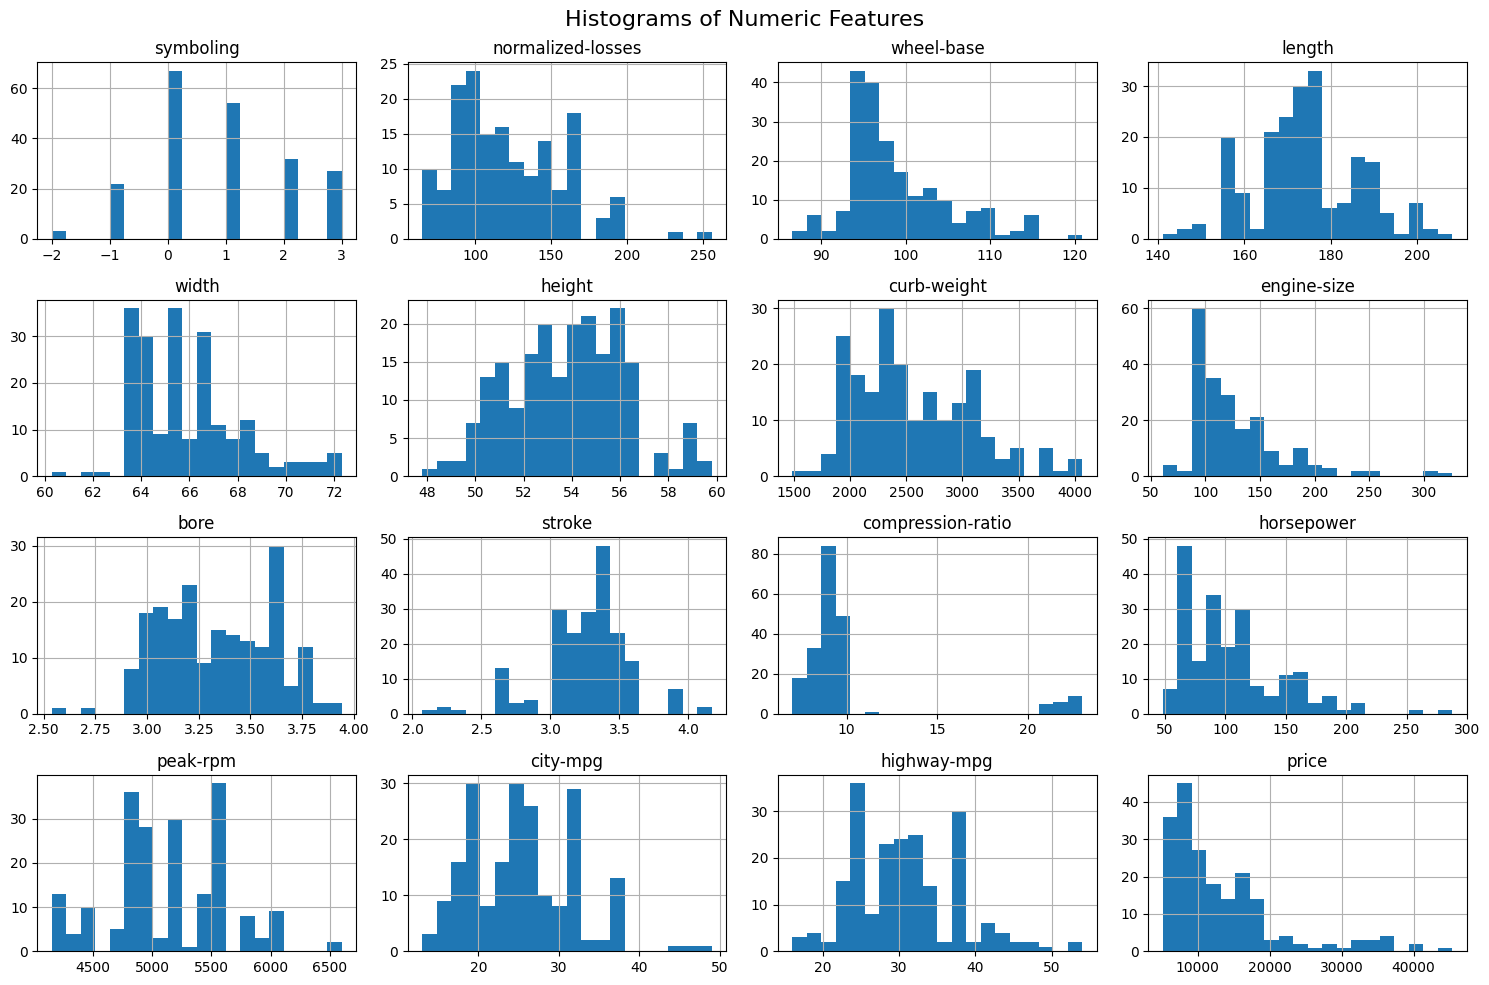

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


**Bar Plots for Selected Categorical Features**

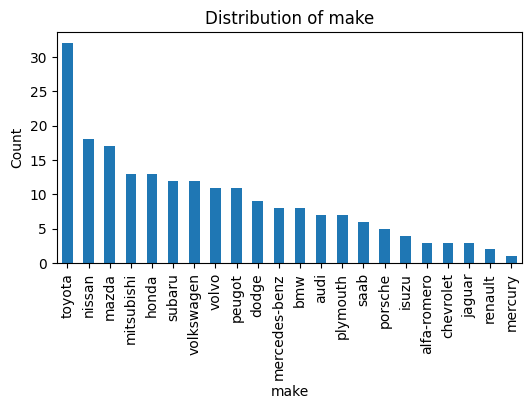

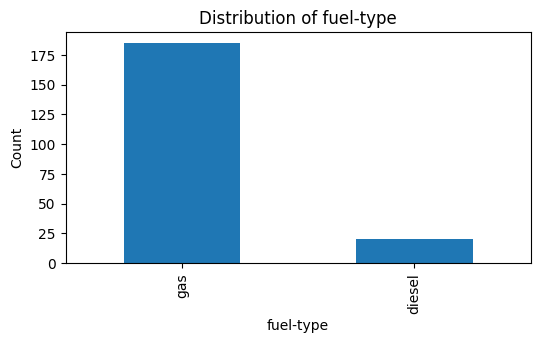

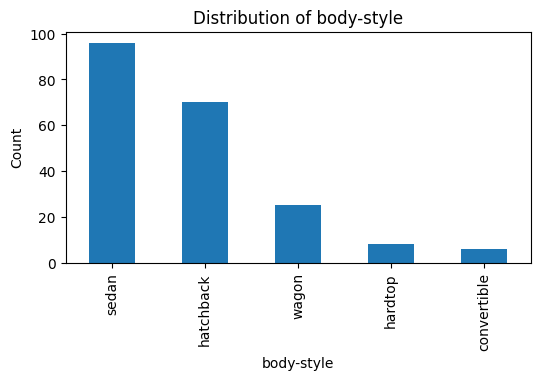

In [12]:
categorical_cols = ["make", "fuel-type", "body-style"]

for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(6,3))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Boxplots for Numeric Features**

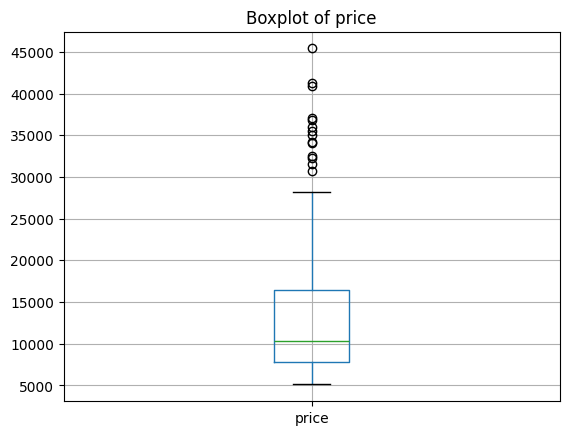

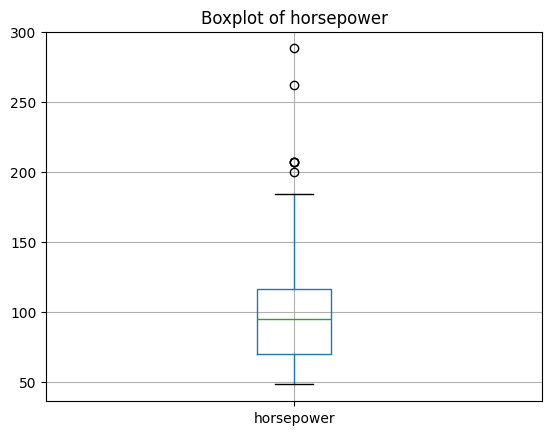

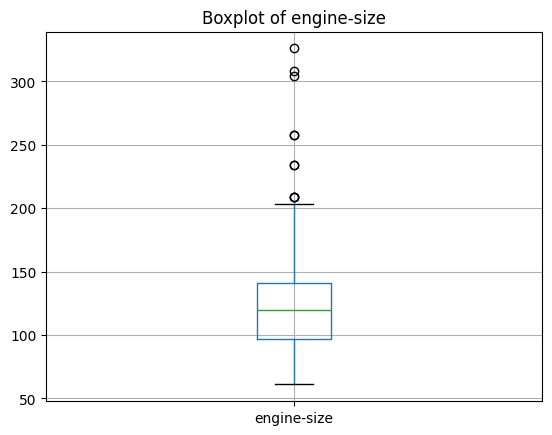

In [13]:
for col in ["price", "horsepower", "engine-size"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()


## **EDA Conclusions**

- The dataset includes 205 observations and 26 attributes.
- Several variables contained missing values (originally marked with `'?'`), including `normalized-losses`, `bore`, `stroke`, `horsepower`, `peak-rpm`, and `price`. These were replaced with `NaN` to detect and analyze missing data accurately.
- Some numeric attributes were initially read as object types due to the `'?'` placeholders. These have been converted to numeric types to support accurate analysis.
- We chose to visualize **all variables** to gain a comprehensive understanding of the dataset.
- For numeric variables, histograms and boxplots were used to inspect distributions, detect skewness, and identify outliers.
- For categorical variables, bar plots were used to examine the frequency distribution of each category.

This full-variable visualization approach helps ensure no important patterns or issues are overlooked before we move into data preparation and feature engineering. It also supports better decisions in choosing which variables need scaling, encoding, or special handling.


---




## **Part 3: Data Preparation & Feature Engineering**

### **Section 1: Feature Scaling**

While summary statistics were briefly explored during the EDA phase in Part 2, this section focuses specifically on identifying which numeric variables require feature scaling for use in machine learning algorithms.

Here, we isolate numeric attributes, analyze their value ranges (minimum and maximum), and justify the need for scaling based on these spreads. This step is necessary to ensure all features contribute equally to distance-based or optimization-based models.

In [14]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Show descriptive statistics to compare ranges
numeric_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
# Print min and max values of each numeric column
for col in numeric_df.columns:
    min_val = numeric_df[col].min()
    max_val = numeric_df[col].max()
    print(f"{col}: min = {min_val}, max = {max_val}, range = {max_val - min_val}")

symboling: min = -2, max = 3, range = 5
normalized-losses: min = 65.0, max = 256.0, range = 191.0
wheel-base: min = 86.6, max = 120.9, range = 34.30000000000001
length: min = 141.1, max = 208.1, range = 67.0
width: min = 60.3, max = 72.3, range = 12.0
height: min = 47.8, max = 59.8, range = 12.0
curb-weight: min = 1488, max = 4066, range = 2578
engine-size: min = 61, max = 326, range = 265
bore: min = 2.54, max = 3.94, range = 1.4
stroke: min = 2.07, max = 4.17, range = 2.1
compression-ratio: min = 7.0, max = 23.0, range = 16.0
horsepower: min = 48.0, max = 288.0, range = 240.0
peak-rpm: min = 4150.0, max = 6600.0, range = 2450.0
city-mpg: min = 13, max = 49, range = 36
highway-mpg: min = 16, max = 54, range = 38
price: min = 5118.0, max = 45400.0, range = 40282.0


After analyzing the value ranges of numeric features, the following variables were identified as requiring scaling:

- **wheel-base** (range ≈ 34.3): Moderate spread
- **length** (range ≈ 67): Long vehicles vs short
- **width** (range ≈ 12): Reasonable spread
- **height** (range ≈ 12): Important for 3D size
- **curb-weight** (range ≈ 2600+): Large range — needs normalization
- **engine-size** (range ≈ 265): Larger engines skew values
- **bore** (range ≈ 1.4): Small, but scaling helps uniformity
- **stroke** (range ≈ 2.1): Scaling ensures comparability
- **compression-ratio** (range ≈ 16): Some values significantly higher
- **horsepower** (range ≈ 240): Large spread
- **peak-rpm** (range ≈ 2450): Bigger scale than others
- **city-mpg** (range ≈ 36): Important for efficiency
- **highway-mpg** (range ≈ 38): Same as above
- **price** (range ≈ 40,000): Huge range and outliers

These features vary in scale from single digits to tens of thousands, so **standardization or normalization** is necessary for fair contribution in ML models.

---

###**Section 2: Imputation of num-of-doors and price**

**Missing Value Summary:**
- `num-of-doors`: Contains missing values
- `price`: Contains missing values

Since we are not allowed to use mean, median, or mode for imputation, and all observations must be retained, we apply targeted imputation strategies for each variable.




In [16]:
# Check missing values
df['num-of-doors'].isna().sum(), df['price'].isna().sum()


(np.int64(2), np.int64(4))

### **Imputation Strategy**
#### 1. `num-of-doors` (Categorical):
We imputed missing values based on `body-style` using the most common value (mode) **within each body-style group** (not the general mode). This preserves logical structure without relying on a global mode.

#### 2. `price` (Numeric):
We used a **linear regression model** trained on `engine-size`, `horsepower`, and `curb-weight` to predict and impute missing prices. These predictors are strongly related to price and allow for realistic estimates without using central tendency statistics.

In [17]:
# Impute num-of-doors using mode within each body-style
door_impute = df.groupby('body-style')['num-of-doors'].agg(lambda x: x.mode().iloc[0])

df['num-of-doors'] = df.apply(
    lambda row: door_impute[row['body-style']] if pd.isna(row['num-of-doors']) else row['num-of-doors'],
    axis=1
)


In [18]:
from sklearn.linear_model import LinearRegression

# Prepare training data
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
features = ['engine-size', 'horsepower', 'curb-weight']

price_train = df.dropna(subset=features + ['price'])
X_train = price_train[features]
y_train = price_train['price']

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and fill missing prices
missing_price = df[df['price'].isna()]
X_missing = missing_price[features]
predicted_prices = model.predict(X_missing)

df.loc[df['price'].isna(), 'price'] = predicted_prices


### **Visualizations**

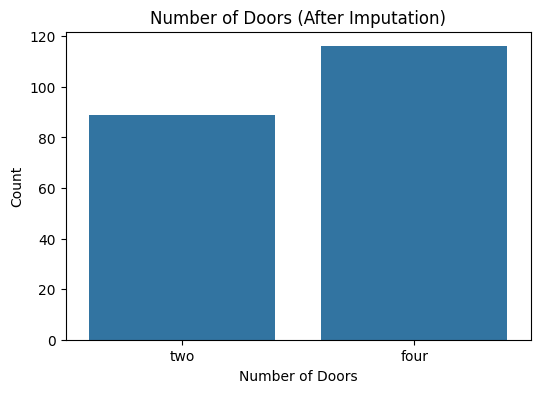

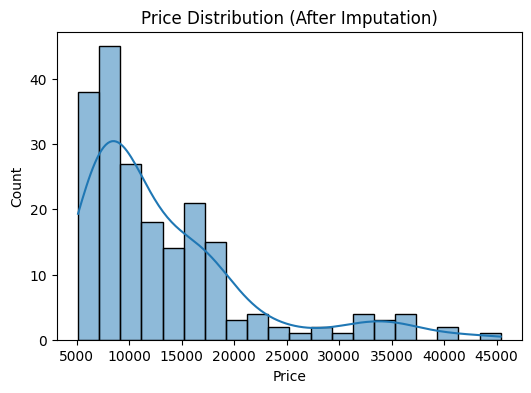

In [31]:
# Plot num-of-doors after imputation
plt.figure(figsize=(6, 4))
sns.countplot(x='num-of-doors', data=df)
plt.title("Number of Doors (After Imputation)")
plt.xlabel("Number of Doors")
plt.ylabel("Count")
plt.show()

# Plot price after imputation
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Price Distribution (After Imputation)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()



### **Imputation Summary**

- All missing values in `num-of-doors` and `price` were successfully imputed.
- For `num-of-doors`, values were filled using the most frequent value for each `body-style`. This maintains consistency within each car type without using a global mode.
- For `price`, missing values were estimated using a regression model based on engine size, horsepower, and curb weight — strong predictors of price.
- The visualizations confirm that the imputed values align well with the original data distributions, avoiding distortions or unrealistic outliers.

This approach complies with project constraints by preserving all data and avoiding bias introduced by simple statistics.

---


### **Section 3: Feature Scaling for engine-size and stroke**

### Step 1: Import Libraries and Prepare Data

We begin by importing the required libraries: `MinMaxScaler` from `sklearn` for feature scaling.

We also ensure that the `stroke` column is properly converted to numeric format. This is important because some values may have been read as strings due to earlier missing value handling.


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Ensure stroke is numeric
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')


### Step 2: Plot Original Distributions (Before Scaling)

We generate histograms and boxplots for both `engine-size` and `stroke` to visualize their original distributions. This helps us understand the spread, skewness, and presence of any outliers in the raw data before scaling.


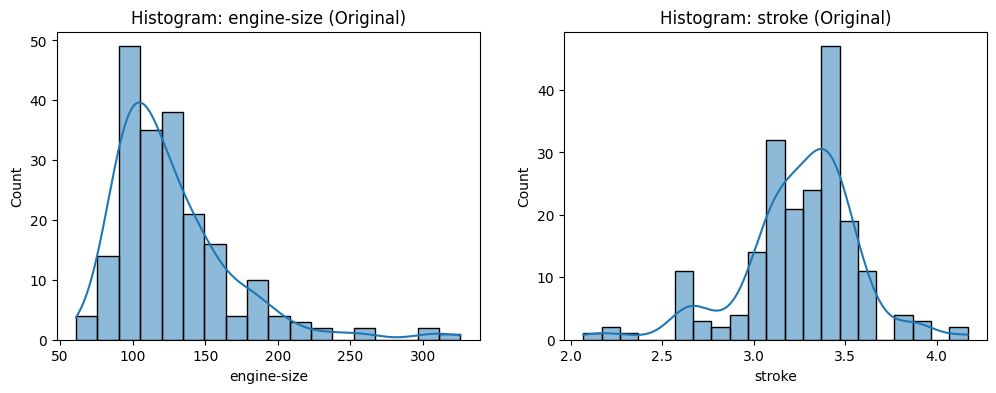

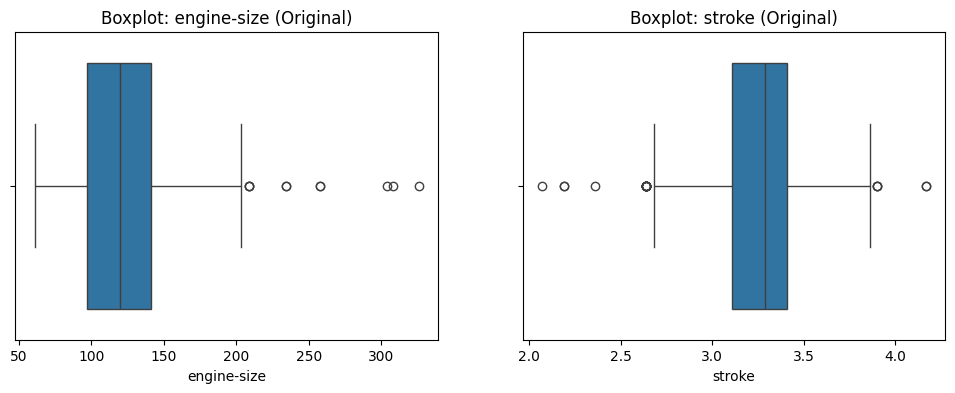

In [21]:
# Histograms before scaling
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['engine-size'], kde=True)
plt.title("Histogram: engine-size (Original)")

plt.subplot(1, 2, 2)
sns.histplot(df['stroke'], kde=True)
plt.title("Histogram: stroke (Original)")
plt.show()

# Boxplots before scaling
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['engine-size'])
plt.title("Boxplot: engine-size (Original)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['stroke'])
plt.title("Boxplot: stroke (Original)")
plt.show()


### Step 3: Apply Min-Max Scaling

We apply the **Min-Max Scaler**, which transforms the data so that all values fall between 0 and 1. This ensures that both features are on the same scale without changing the shape of the distribution.

The new scaled columns are stored as `engine-size_scaled` and `stroke_scaled`.


In [32]:
# Basic manual scaling for engine-size
min_engine = df['engine-size'].min()
max_engine = df['engine-size'].max()

df['engine-size_scaled'] = (df['engine-size'] - min_engine) / (max_engine - min_engine)

# Basic manual scaling for stroke
min_stroke = df['stroke'].min()
max_stroke = df['stroke'].max()

df['stroke_scaled'] = (df['stroke'] - min_stroke) / (max_stroke - min_stroke)


### Step 4: Plot Scaled Distributions (After Scaling)

We generate new histograms and boxplots for the scaled features. These plots help verify that the values have been correctly scaled into the range [0, 1], and that the overall distribution remains consistent with the original (i.e., scaling did not distort the shape).


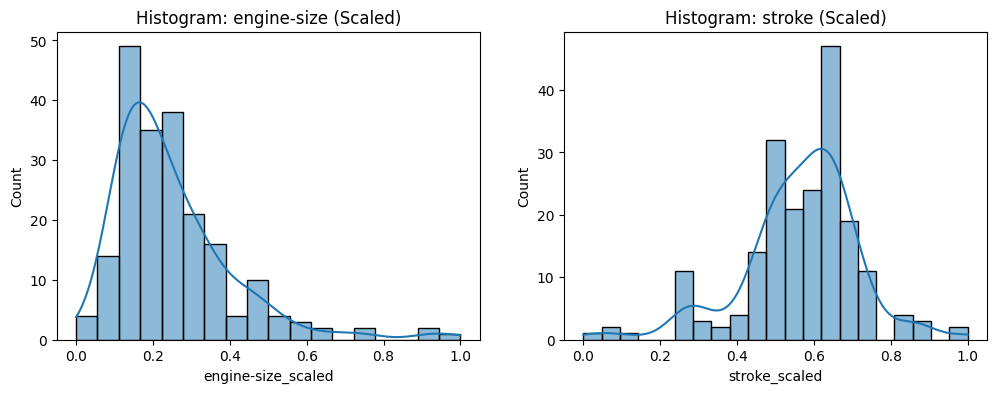

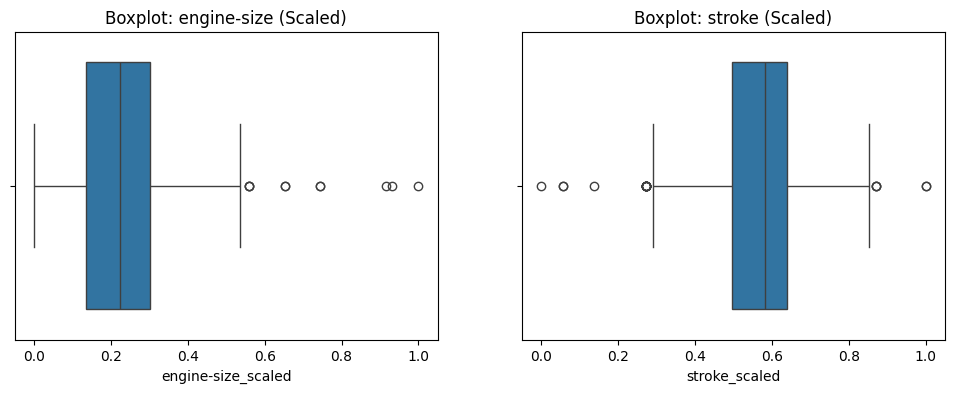

In [33]:
# Histograms after scaling
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['engine-size_scaled'], kde=True)
plt.title("Histogram: engine-size (Scaled)")

plt.subplot(1, 2, 2)
sns.histplot(df['stroke_scaled'], kde=True)
plt.title("Histogram: stroke (Scaled)")
plt.show()

# Boxplots after scaling
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['engine-size_scaled'])
plt.title("Boxplot: engine-size (Scaled)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['stroke_scaled'])
plt.title("Boxplot: stroke (Scaled)")
plt.show()


### Step 5: Summary and Interpretation

The Min-Max scaling method successfully transformed both `engine-size` and `stroke` into the range [0, 1], as observed in the scaled histograms and boxplots.

- The shape of the original distributions remains similar, ensuring the data is not distorted.
- While scaling does not eliminate skewness or outliers, it ensures that these features do not dominate other variables during model training.
- These scaled features are now ready for use in distance-sensitive or gradient-based machine learning algorithms.

---

## **Section 4: Categorical Data Preparation**

# Variable 1: `symboling`

- **Type:** Numeric / Ordinal  
- **Reason:** It represents risk categories (e.g., -3 to +3), where a higher number indicates a higher risk.
- **Preparation Method:** Use the values as-is, since the numeric values already represent an ordinal scale. No transformation is needed unless converting to one-hot for certain models — but that’s not required here.


## Variable 2: `make`

- **Type:** Categorical / Nominal  
- **Reason:** It identifies the brand of the car (e.g., honda, bmw, audi). There is no natural order.
- **Preparation Method:** Apply **One-Hot Encoding** since the values are nominal and unordered. This allows each brand to be treated as a separate binary feature.


## Variable 3: `engine-type`

- **Type:** Categorical / Nominal  
- **Reason:** It describes the type of engine design (e.g., ohc, dohc, rotor). No ordinal relationship exists.
- **Preparation Method:** Apply **One-Hot Encoding**, turning each engine type into a binary feature.


In [24]:
# One-hot encode 'make' and 'engine-type'
encoded_df = pd.get_dummies(df[['make', 'engine-type']], drop_first=True)

# Concatenate encoded columns with original df
df_encoded = pd.concat([df, encoded_df], axis=1)

# Optionally drop the original columns
df_encoded.drop(['make', 'engine-type'], axis=1, inplace=True)


### Encoded Sample Output

Below is a preview of the encoded DataFrame showing the newly created one-hot encoded columns:

We used `drop_first=True` to avoid the dummy variable trap and reduce multicollinearity.


In [25]:
# Show first few columns created for 'make'
df_encoded.filter(like='make_').head()


,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df_encoded.filter(like='engine-type_').head()


,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,True,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


### Summary

- `symboling` is treated as ordinal numeric and kept as-is.
- `make` and `engine-type` were encoded using **One-Hot Encoding** to convert categorical nominal data into numerical format.
- This ensures compatibility with machine learning models that require numerical inputs.
---

## Section 5: Dimensionality Reduction

We want to reduce the number of features while still keeping most of the useful information. To do this, we will use a method called **Principal Component Analysis (PCA)**.

PCA creates new features that are not related to each other (orthogonal). These new features are made from our original ones, but they keep most of the important patterns.

We will use PCA on the following 10 numeric features:

- wheel-base, length, width, height, curb-weight, engine-size, compression-ratio, horsepower, peak-rpm, city-mpg



In [34]:
# Step 1: Select the 10 columns
cols = [
    'wheel-base', 'length', 'width', 'height', 'curb-weight',
    'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg'
]

# Step 2: Remove rows with missing values
data = df[cols].dropna()

# Step 3: Scale the data by subtracting mean and dividing by std (standardization)
scaled = (data - data.mean()) / data.std()



Now we will apply PCA to the scaled data to create new features that summarize the original ones.


In [35]:
from sklearn.decomposition import PCA

# Step 4: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled)

# Step 5: Show how much variance each component explains
for i, val in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1} explains {val:.2%} of the variance")


Component 1 explains 54.69% of the variance
Component 2 explains 21.55% of the variance
Component 3 explains 9.19% of the variance
Component 4 explains 5.84% of the variance
Component 5 explains 3.05% of the variance
Component 6 explains 2.29% of the variance
Component 7 explains 1.34% of the variance
Component 8 explains 0.81% of the variance
Component 9 explains 0.75% of the variance
Component 10 explains 0.51% of the variance


### Variance Explained by Principal Components

We plot the variance explained by each component to decide how many are useful. The first few components usually capture most of the information in the data.


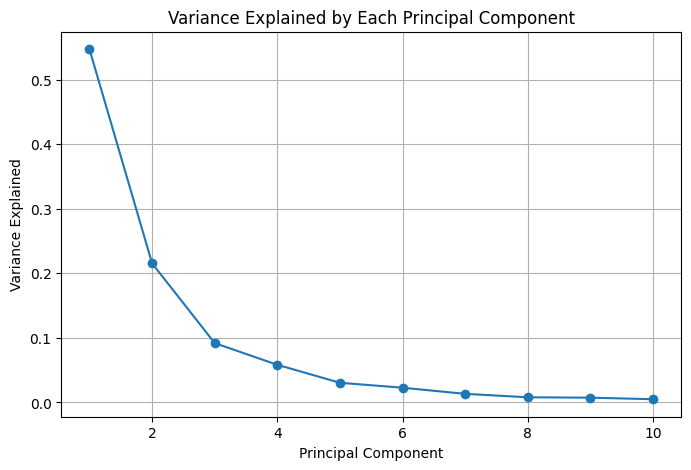

In [38]:
# Plot the variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title("Variance Explained by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()


### Summary of PCA Results

- We used PCA to reduce 10 features into fewer new ones.
- Each new feature (called a "principal component") captures some percentage of the total information.
- The first few components usually explain most of the variance.
- These components are **orthogonal**, meaning they are not related to each other.

This makes our data simpler, easier to work with, and better for some machine learning models.

